**Developed by:** [Georgii Bocharov](https://github.com/georgebv)

**E-Mail:** bocharovgeorgii@gmail.com

**coastlib:** https://github.com/georgebv/coastlib

**License:** GNU General Public License v3.0


# Introduction
This notebook provides examples for the `noaa_coops` module of the [coastlib](https://github.com/georgebv/coastlib) library. Source code for this module [can be found here](https://github.com/georgebv/coastlib/blob/master/coastlib/data/noaa_coops.py).

The `noaa_coops` module is a part of the `coastlib.data` package. This module provides interface to the [NOAA CO-OPS](https://co-ops.nos.noaa.gov/) data portal via the [CO-OPS API](https://tidesandcurrents.noaa.gov/api/). It allows retrieval of environmental data collected by CO-OPS sensors such as wind, water levels, currents, salinity, air pressure, etc. in the form of [pandas](https://pandas.pydata.org/) [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). With the help of this tool one can automate extraction of large amounts of data from NOAA stations for further processing and storing.

# Basic usage
Let's start by extracting water level data for the New York City [the Battery](https://duckduckgo.com/?q=noaa+the+battery&t=ffab&ia=web) station for the October 2012 time period (Hurricane Sandy):

In [1]:
%matplotlib inline

from coastlib.data import coops_api, coops_api_batch, coops_datum
df = coops_api(station=8518750, begin_date='20121025', end_date='20121101', product='water_level', datum='NAVD')
df.dropna().head()

,v,s,f,q
Time (gmt),,,,
2012-10-25 00:00:00,0.466,0.157,"0,0,0,0",v
2012-10-25 00:06:00,0.358,0.095,"0,0,0,0",v
2012-10-25 00:12:00,0.249,0.190,"0,0,0,0",v
2012-10-25 00:18:00,0.135,0.105,"0,0,0,0",v
2012-10-25 00:24:00,0.033,0.144,"0,0,0,0",v


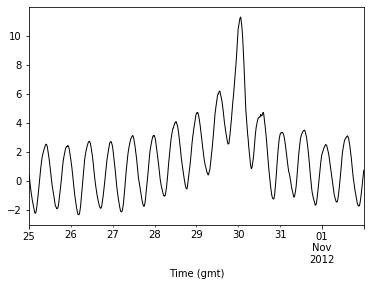

In [2]:
df['v'].plot(color='k', lw=1)

Let's also get tidal datum for this station:

In [3]:
datum = coops_api(station=8518750, begin_date='20121025', end_date='20121101', product='datums', datum='MLLW', units='metric')
datum

,Value
Datum,
MHHW,2.543
MHW,2.445
DTL,1.773
MTL,1.755
MSL,1.785
MLW,1.065
MLLW,1.002
GT,1.542
MN,1.380


The `coops_api` is the most direct way of interfacing with the CO-OPS API. Its drawback is that it allows for extraction of data for only a relatively small window (see [CO-OPS API](https://tidesandcurrents.noaa.gov/api/) documentation). Serious applications require years of data. That's where the `coops_api_batch` function becomes much more convenient.

# Batch Data Extraction
Let's get 2 years of wind data for the [Robbins Reef](https://tidesandcurrents.noaa.gov/stationhome.html?id=8530973) station:

In [4]:
wind = coops_api_batch(station=8530973, begin_date='20170101', end_date='20190101', product='wind', datum='NAVD')
wind.dropna().head()

,s,d,dr,g,f
Time (gmt),,,,,
2017-03-16 15:00:00,24.49,285.0,WNW,29.74,"0,0"
2017-03-16 15:06:00,23.52,287.0,WNW,28.19,"0,0"
2017-03-16 15:12:00,20.02,288.0,WNW,24.49,"0,0"
2017-03-16 15:18:00,19.63,285.0,WNW,24.30,"0,0"
2017-03-16 15:24:00,21.58,286.0,WNW,26.24,"0,0"


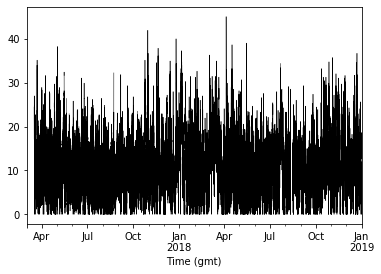

In [5]:
wind['s'].plot(lw=.5, color='k')

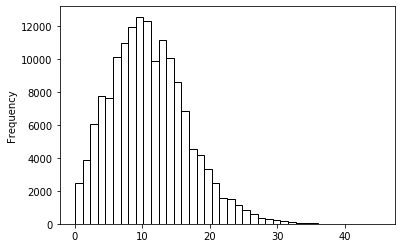

In [6]:
wind['s'].plot(kind='hist', bins=40, facecolor='None', edgecolor='k')

Let's save this wind data for future use. pandas also allows saving DataFrame objects to csv or xlsx formats by using built-in DataFrame methods.

In [7]:
wind.to_pickle(r'../../files/rr_wind_speed.pyc')

# Datum Extraction
Though the `coops_api` function provides a way to extract tidal datums, the recommended way to do so is through the `coops_datum` function. This function requires less arguments and provides a more detailed output and, optionally, station metadata. These methods are demonstrated for the [Arena Cove](https://tidesandcurrents.noaa.gov/stationhome.html?id=9416841) station, located in California.

In [8]:
datum, meta = coops_datum(station=9416841, units='english', metadata=True)

In [9]:
datum

,Value,Description
Datum,,
STND,0.00,Station Datum
MHHW,34.81,Mean Higher-High Water
MHW,34.14,Mean High Water
DTL,31.88,Mean Diurnal Tide Level
MTL,32.12,Mean Tide Level
MSL,32.08,Mean Sea Level
MLW,30.10,Mean Low Water
MLLW,28.94,Mean Lower-Low Water
GT,5.86,Great Diurnal Range


In [10]:
meta

,Value
Property,
accepted,Dec 6 2011
superseded,
epoch,1983-2001
units,feet
OrthometricDatum,NAVD88
LAT,26.755
LATdate,19900525
LATtime,13:36
HAT,36.587


# Final Remarks
This tutorial doesn't cover all functionality and ways of using the `noaa_coops` module. Please refer to the [module source code](https://github.com/georgebv/coastlib/blob/master/coastlib/data/noaa_coops.py) and the API reference for more information on arguments not covered here.